In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('output.csv',  index_col=[0])

In [3]:
df.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,lat,lng,population,density,Year
0,43,Good,Ozone,1,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
1,42,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
2,43,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
3,42,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022
4,43,Good,Ozone,2,Flagstaff,Arizona,35.1872,-111.6194,79624.0,428.0,2022


Encoding categorical data: `Defining Parameter`, `city_ascii` and `state_name`.

In [4]:
#df['Category'] = df['Category'].astype('category')
#df['Category'] = df['Category'].cat.codes
df['Defining Parameter'] = df['Defining Parameter'].astype('category')
df['Defining Parameter'] = df['Defining Parameter'].cat.codes
df['city_ascii'] = df['city_ascii'].astype('category')
df['city_ascii'] = df['city_ascii'].cat.codes
df['state_name'] = df['state_name'].astype('category')
df['state_name'] = df['state_name'].cat.codes
df.head()

,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_name,lat,lng,population,density,Year
0,43,Good,2,1,25,1,35.1872,-111.6194,79624.0,428.0,2022
1,42,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022
2,43,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022
3,42,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022
4,43,Good,2,2,25,1,35.1872,-111.6194,79624.0,428.0,2022


### Separar os dados para treino, teste e validação
Aplicaremos a função `train_test_split` duas vezes para obter os três conjuntos: treino, teste e validação.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df.Category
X = df.drop('Category', axis=1)
train_ratio = 0.7
test_ratio = 0.20
validation_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=validation_ratio/(train_ratio+test_ratio))

In [7]:
# iniciando o MLFlow
import mlflow

In [ ]:
mlflow.set_experiment('air-quality-category')

### Treinamentos

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
def evaluate_model(classifier):
    acc = accuracy_score(y_test, classifier.predict(X_test))
    print("Test Accuracy: ", acc)
    precision =  precision_score(y_test, classifier.predict(X_test), average='weighted')
    print("Test Precision: ", precision)
    f1 = f1_score(y_test, classifier.predict(X_test), average='weighted')
    print("Test F1 score: ", f1)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))
    return acc, precision, f1

In [10]:
mlflow.start_run(experiment_id='1', run_name='air-quality-category')

<ActiveRun: >

#### K-nearest neighbors

In [11]:
# create and fit knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
(accuracy_knn, precision_knn, f1_knn) = evaluate_model(knn)

Test Accuracy:  0.9949940200382431
Test Precision:  0.9949879714710038
Test F1 score:  0.994990405864923
Test Confusion Matrix:
[[177421      0    218      0      0      0]
 [     0    135      0      2      0      4]
 [   306      0  73653      0    201      0]
 [     0      0      0   6735    154     52]
 [     0      0    289    129  17400      0]
 [     0      1      0     42      0   2524]]


In [13]:
mlflow.log_metric("accuracy knn", accuracy_knn)
mlflow.log_metric("precision knn", precision_knn)
mlflow.log_metric("f1 score knn", f1_knn)

In [14]:
mlflow.sklearn.log_model(knn, 'knn')

ModelInfo(artifact_path='knn', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/8987cbf19f42470da3b811036e2b664c/knn', model_uuid='b2fedcd70608440ba36c869c5693414d', run_id='8987cbf19f42470da3b811036e2b664c', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-28 00:44:43.303256', mlflow_version='1.28.0')

#### Naive Bayes

In [15]:
# create and fit naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
(accuracy_gnb, precision_gnb, f1_gnb) = evaluate_model(gnb)

Test Accuracy:  0.6402104087142724
Test Precision:  0.5364733661507681
Test F1 score:  0.54453877357957
Test Confusion Matrix:
[[170739      0   5955      0      0    945]
 [    26     76      5     11      0     23]
 [ 64572      0   7343      0      0   2245]
 [  5517      0    843      0    259    322]
 [ 14314      0   2966      0      0    538]
 [  1601      0    335      0      0    631]]


In [17]:
mlflow.log_metric("accuracy Naive Bayes", accuracy_gnb)
mlflow.log_metric("precision Naive Bayes", precision_gnb)
mlflow.log_metric("f1 score Naive Bayes", f1_gnb)

In [18]:
mlflow.sklearn.log_model(gnb, 'gnb')

ModelInfo(artifact_path='gnb', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/8987cbf19f42470da3b811036e2b664c/gnb', model_uuid='faf153cf657e4fbcb59e67ac3ce0bd09', run_id='8987cbf19f42470da3b811036e2b664c', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-28 00:45:41.339514', mlflow_version='1.28.0')

#### Multi layer perceptron

In [41]:
# create and fit MLP with scikit learn
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

C:\Users\Anna Luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
#  create and fit MLP with PyTorch

In [13]:
(accuracy_mlp, precision_mlp, f1_mlp) = evaluate_model(mlp)

In [17]:
mlflow.log_metric("accuracy MLP", accuracy_mlp)
mlflow.log_metric("rmse MLP", precision_mlp)
mlflow.log_metric("r2 MLP", f1_mlp)

In [19]:
mlflow.sklearn.log_model(mlp, 'mlp')

ModelInfo(artifact_path='mlp', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/abd0369f53534f0b9dfa68e7384c2fe2/mlp', model_uuid='56297310c8b04e9bbf0dbcb401c0b585', run_id='abd0369f53534f0b9dfa68e7384c2fe2', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-21 18:28:33.858684', mlflow_version='1.28.0')

#### Random forest

In [ ]:
# create and fit Random Forest
random_forest = RandomForestClassifier(max_depth=4, random_state=0)
random_forest.fit(X_train, y_train)

In [ ]:
(accuracy_randForest, precision_randForest, f1_randForest) = evaluate_model(random_forest)

In [21]:
mlflow.log_metric("accuracy random forest", accuracy_randForest)
mlflow.log_metric("precision random forest", precision_randForest)
mlflow.log_metric("f1 score random forest", f1_randForest)

In [22]:
mlflow.sklearn.log_model(random_forest, 'random forest')

ModelInfo(artifact_path='random forest', flavors={'python_function': {'model_path': 'model.pkl', 'loader_module': 'mlflow.sklearn', 'python_version': '3.10.1', 'env': 'conda.yaml'}, 'sklearn': {'pickled_model': 'model.pkl', 'sklearn_version': '1.1.2', 'serialization_format': 'cloudpickle', 'code': None}}, model_uri='runs:/8987cbf19f42470da3b811036e2b664c/random forest', model_uuid='e50d5702c7ca413abe446aee26fc38e3', run_id='8987cbf19f42470da3b811036e2b664c', saved_input_example_info=None, signature_dict=None, utc_time_created='2022-09-28 00:48:12.757718', mlflow_version='1.28.0')

In [54]:
mlflow.end_run()

### Seleção de hiper-parâmetros

#### KNN

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
params_knn = {
    'metric': ['euclidean', 'minkowski'],
    'n_neighbors': [2, 3, 5, 7, 10, 15, 20],
    'p': [1,2]
}

In [52]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=params_knn,
                           cv=4, n_jobs=-1, verbose=1, scoring = 'accuracy')

In [53]:
grid_search.fit(X_valid, y_valid)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [2, 3, 5, 7, 10, 15, 20], 'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [56]:
print(grid_search.best_score_)
best_params_knn = grid_search.best_params_
print(best_params_knn)

0.9719556306287145
{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}


#### Gaussian NB

In [29]:
import skopt
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV

In [33]:
params_gnb  = {'var_smoothing': np.logspace(0,-9, num=100)}

In [57]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=1)
search = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_gnb, n_jobs=-1, cv=cv, scoring ='accuracy')

In [58]:
search.fit(X_valid, y_valid)

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=5, random_state=1),
              estimator=GaussianNB(), n_jobs=-1, scoring='accuracy',
              search_spaces={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [61]:
print(search.best_score_)
best_params_nb = search.best_params_
print(best_params_nb)

0.6449053228776509
OrderedDict([('var_smoothing', 4.328761281083053e-06)])


#### Multi-layer perceptron

* Atenção: o scikit learn não foi indicado para uso com MLP, então vamos trocar pelo PyTorch

#### Random Forest

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
params_rf = {
    'n_estimators': [50, 70, 100, 130],
    'max_depth': [1,2,4, 7, 10]
}

In [60]:
random_search_randForest = RandomizedSearchCV(RandomForestClassifier(), params_rf, random_state=0)
search_randForest = random_search_randForest.fit(X_valid, y_valid)

In [62]:
print(search_randForest.best_score_)
best_params_rf = search_randForest.best_params_
print(best_params_rf)

0.998882812869617
{'n_estimators': 70, 'max_depth': 10}


### Selecionar melhor modelo e aplicar otimização de acordo com os melhores hiper-parâmetros
Nesta etapa iremos treinar novos modelos de cada um dos classificadores utilizando os melhores hiper parâmetros obtidos na etapa anterior. Em seguida, iremos avaliar-los sobre o conjunto de teste e apontar aquele com melhores resultados.

In [63]:
print(best_params_knn)

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}


In [64]:
knn_best_estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)
knn_best_estimator.fit(X_train, y_train)
y_pred_best_knn = knn_best_estimator.predict(X_test)

In [65]:
(best_acc_knn, best_prec_knn, best_f1_knn) = evaluate_model(knn_best_estimator)

Test Accuracy:  0.9949940200382431
Test Precision:  0.9949879714710038
Test F1 score:  0.994990405864923
Test Confusion Matrix:
[[177421      0    218      0      0      0]
 [     0    135      0      2      0      4]
 [   306      0  73653      0    201      0]
 [     0      0      0   6735    154     52]
 [     0      0    289    129  17400      0]
 [     0      1      0     42      0   2524]]


In [67]:
print(best_params_nb)

OrderedDict([('var_smoothing', 4.328761281083053e-06)])


In [68]:
gnb_best_estimator = GaussianNB(var_smoothing=4.328761281083053e-06)
gnb_best_estimator.fit(X_train, y_train)
y_pred_best_gnb = gnb_best_estimator.predict(X_test)

In [69]:
(best_acc_nb, best_prec_nb, best_f1_nb) = evaluate_model(gnb_best_estimator)

Test Accuracy:  0.6446506198391497


C:\Users\Anna Luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Precision:  0.5442905154661274
Test F1 score:  0.5466544953561634
Test Confusion Matrix:
[[172503      0   4191      0      0    945]
 [    98      0     43      0      0      0]
 [ 64486      0   7429      0      0   2245]
 [  5586      0   1145      0      0    210]
 [ 14517      0   2763      0      0    538]
 [  1613      0    857      0      0     97]]


In [ ]:
# colocar aqui os melhores hiper parametros para o mlp

In [ ]:
mlp_best_estimator = MLPClassifier()
mlp_best_estimator.fit(X_train, y_train)
y_pred_best_mlp = mlp_best_estimator.predict(X_test)

In [71]:
print(best_params_rf)

{'n_estimators': 70, 'max_depth': 10}


In [72]:
randForest_best_estimator = RandomForestClassifier(n_estimators= 70, max_depth=10)
randForest_best_estimator.fit(X_train, y_train)
y_pred_best_rf = randForest_best_estimator.predict(X_test)

In [73]:
(best_acc_rf, best_prec_rf, best_f1_rf) = evaluate_model(randForest_best_estimator)

Test Accuracy:  0.9998675098293384
Test Precision:  0.9998672547396271
Test F1 score:  0.9998669809965022
Test Confusion Matrix:
[[177639      0      0      0      0      0]
 [     0    132      0      5      0      4]
 [     0      0  74160      0      0      0]
 [     0      0      0   6941      0      0]
 [     0      0      0      0  17818      0]
 [     0      5      0     23      0   2539]]


Logar métricas resultantes no MLFlow

In [75]:
mlflow.log_metric("Best Accuracy", best_acc_rf)
mlflow.log_metric("Best Precision", best_prec_rf)
mlflow.log_metric("Best f1 score", best_f1_rf)

## Clustering
Vamos implementar o algoritmo k-means para obter uma clusterização dos dados.

In [76]:
from sklearn.cluster import KMeans

In [77]:
kmeans = KMeans(n_clusters = 6, random_state=0, n_init=20)

In [86]:
kmeans.fit(X)

KMeans(n_clusters=6, n_init=20, random_state=0)

In [87]:
y_pred_kmeans = kmeans.labels_

In [93]:
print(y_pred_kmeans)

[1 1 1 ... 1 1 1]


In [98]:
y_pred_kmeans_str = []

for i in y_pred_kmeans:
    if i == 1:
        y_pred_kmeans_str.append('Good')
    elif i == 2:
        y_pred_kmeans_str.append('Moderate')
    elif i == 3:
        y_pred_kmeans_str.append('Unhealthy for Sensitive Groups')
    elif i == 4:
        y_pred_kmeans_str.append('Unhealthy')
    elif i == 5:
        y_pred_kmeans_str.append('Very Unhealthy')
    else:
        y_pred_kmeans_str.append('Hazardous')

In [80]:
import sklearn.metrics
import seaborn as sns

In [99]:
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_kmeans_str)

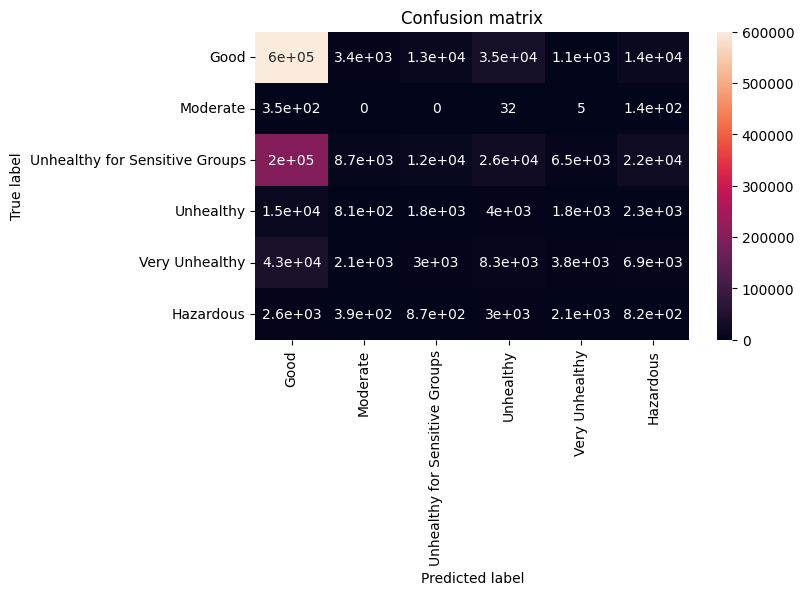

In [101]:
import matplotlib.pyplot as plt
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix, annot=True,xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel('Predicted label')
plt.show()